In [1]:
(
    1 + 0
)  # Utility cell. Sometimes "Jupyter" skipps the first cell when running all cells. Especially after a restart.

1

In [2]:
(
    1 + 1
)  # Utility cell. Sometimes "Jupyter" skipps the first cell when running all cells. Especially after a restart.

2

In [3]:
print(f"N{1+2} utility cell running...")

N3 utility cell running...


In [4]:
# Resolve the path to the "src" folder with helper functions
import config_notebooks

PYTHONPATH: C:\Users\Admin\Documents\Univer\MASTER THESIS IDEAS\Flavio Pinehro\11_MasterProject\src;C:\Users\Admin\Documents\Univer\MASTER THESIS IDEAS\Flavio Pinehro\11_MasterProject\src\imports


In [5]:
from n06_import import *

os.getcwd():
c:\Users\Admin\Documents\Univer\MASTER THESIS IDEAS\Flavio Pinehro\11_MasterProject\notebooks
input_file_location:
..\data\05_mor_silver
output_file_location:
..\data\06_mor_gold


In [6]:
# # Resolve the path to the 'src' folder with helper functions
# import config_notebooks
# from importlib import reload

# # Import the module and reload it
# import n06_import_reload

# reload(n06_import_reload)

# # Re-import the functions from the reloaded module
# from n06_import_reload import *

### Importing info about countries: "country_code"
Countries have been already imported in the n01_Ingested_gdp notebook

In [7]:
initial_input_location = input_file_location

input_file_location = os.path.join("..", "data", "02_ingested")
input_file_name = "locations.parquet"
location_df = read_hs92_parquet_data(
    input_file_location, input_file_name, f_convert_dtype=False
)
dumped_data = restore_cache(input_file_location=input_file_location)
unreliable_locations = dumped_data["unreliable_locations"]

input_file_location = initial_input_location

data restored:['valid_gdp_country_codes', 'valid_gdp_country_ids', 'valid_gdp_locations', 'export_years', 'unreliable_locations', 'rolling_exports_years', 'reliable_gdp_codes']


In [8]:
location_df.head(2)

,country_id,country_name,country_code
0,533,Aruba,ABW
1,4,Afghanistan,AFG


In [9]:
df_stats(location_df, "location_df")

['location_df', <class 'pandas.core.frame.DataFrame'>]
shape:
(252, 3)
data types:
country_id       int16
country_name    object
country_code    object
dtype: object
columns:
['country_id', 'country_name', 'country_code']
       country_id
count      252.00
mean       438.84
std        257.78
min          4.00
25%        217.00
50%        437.00
75%        655.25
max        999.00
Total memory usage: 32784 bytes


In [10]:
# Switching to the "category" data type for merging with the GDP data
categorical_columns = ["country_name"]
# categorical_columns = ["country_id", "country_name", "country_code"]
location_df = switch_to_dtype(
    location_df, default_dtype="category", categorical_columns=categorical_columns
)

country_name column initial type:
object
country_name column final type:
category


In [11]:
low_codes = set(location_df["country_code"].str.lower().unique())
# checking if "wld" or "aia" are in the set of lower case country codes
"wld" in low_codes, "aia" in low_codes

(False, True)

In [12]:
location_df[
    location_df["country_code"].isin(["GIB", "PRK", "VGB", "AIA", "BLR", "SYC", "WLD"])
]

,country_id,country_name,country_code
3,660,Anguilla,AIA
28,112,Belarus,BLR
84,292,Gibraltar,GIB
178,408,North Korea,PRK
211,690,Seychelles,SYC
237,92,British Virgin Islands,VGB


## Processing ECI data

In [13]:
input_file_name = "ECI.parquet"
ECI = read_hs92_parquet_data(
    input_file_location, input_file_name, f_convert_dtype=False
)

In [14]:
categorical_columns = ["year", "country_id"]
ECI = switch_to_dtype(
    ECI, default_dtype="category", categorical_columns=categorical_columns
)

year column initial type:
int16
year column final type:
category
country_id column initial type:
int16
country_id column final type:
category


In [15]:
df_stats(ECI, "ECI")

['ECI', <class 'pandas.core.frame.DataFrame'>]
shape:
(1152, 22)
data types:
year          category
country_id    category
k_c0             int32
ECI_0          float64
ECI_1          float64
ECI_2          float64
ECI_3          float64
ECI_4          float64
ECI_5          float64
ECI_6          float64
ECI_7          float64
ECI_8          float64
ECI_9          float64
ECI_10         float64
ECI_11         float64
ECI_12         float64
ECI_13         float64
ECI_14         float64
ECI_15         float64
ECI_16         float64
ECI_17         float64
ECI_18         float64
dtype: object
columns:
['year', 'country_id', 'k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3', 'ECI_4', 'ECI_5', 'ECI_6', 'ECI_7', 'ECI_8', 'ECI_9', 'ECI_10', 'ECI_11', 'ECI_12', 'ECI_13', 'ECI_14', 'ECI_15', 'ECI_16', 'ECI_17', 'ECI_18']


          k_c0     ECI_0     ECI_1     ECI_2     ECI_3     ECI_4     ECI_5  \
count 1,152.00  1,152.00  1,152.00  1,152.00  1,152.00  1,152.00  1,152.00   
mean    179.83  0.000000 -0.000000 -0.000000 -0.000000 -0.000000  0.000000   
std     126.02      1.00      1.00      1.00      1.00      1.00      1.00   
min       7.00     -1.39     -2.83     -2.67     -2.99     -2.49     -2.83   
25%      78.00 -0.808449 -0.668768 -0.748906 -0.661838 -0.756843 -0.690107   
50%     158.00 -0.171143  0.090858 -0.051378  0.168680 -0.077772  0.159323   
75%     251.00  0.565839  0.726189  0.816547  0.759513  0.791234  0.816117   
max     560.00      2.92      2.63      2.13      2.35      2.26      2.29   

          ECI_6     ECI_7     ECI_8     ECI_9    ECI_10    ECI_11    ECI_12  \
count  1,152.00  1,152.00  1,152.00  1,152.00  1,152.00  1,152.00  1,152.00   
mean  -0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000 -0.000000   
std        1.00      1.00      1.00      1.00      1.00     

In [16]:
ECI.head()

,year,country_id,k_c0,ECI_0,ECI_1,ECI_2,ECI_3,ECI_4,ECI_5,ECI_6,...,ECI_9,ECI_10,ECI_11,ECI_12,ECI_13,ECI_14,ECI_15,ECI_16,ECI_17,ECI_18
0,2012,8,166,-0.131844,0.831169,-0.040967,0.548779,-0.090630,0.436914,-0.154422,...,0.349790,-0.239123,0.332050,-0.262405,0.321890,-0.277831,0.316103,-0.288045,0.312832,-0.294829
1,2012,12,15,-1.30,0.641786,-1.32,0.768264,-1.37,0.892379,-1.31,...,1.02,-1.20,1.04,-1.16,1.06,-1.13,1.07,-1.12,1.07,-1.10
2,2012,24,7,-1.36,-0.805907,-2.05,0.246574,-1.83,0.673335,-1.63,...,1.05,-1.41,1.13,-1.35,1.18,-1.31,1.21,-1.29,1.22,-1.27
3,2012,31,22,-1.25,1.52,-0.961099,1.32,-0.978661,1.18,-1.01,...,1.06,-1.02,1.04,-1.02,1.03,-1.02,1.02,-1.02,1.02,-1.02
4,2012,32,204,0.162505,-0.588760,0.331355,-0.298881,0.301952,-0.237945,0.287522,...,-0.262653,0.286262,-0.277414,0.289150,-0.287426,0.292120,-0.293705,0.294720,-0.297496,0.296829


In [17]:
print(f"locations:\n{location_df.columns}\ngdp:\n{ECI.columns}", sep="\n")

locations:
Index(['country_id', 'country_name', 'country_code'], dtype='object')
gdp:
Index(['year', 'country_id', 'k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3',
       'ECI_4', 'ECI_5', 'ECI_6', 'ECI_7', 'ECI_8', 'ECI_9', 'ECI_10',
       'ECI_11', 'ECI_12', 'ECI_13', 'ECI_14', 'ECI_15', 'ECI_16', 'ECI_17',
       'ECI_18'],
      dtype='object')


In [18]:
ECI.columns

Index(['year', 'country_id', 'k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3',
       'ECI_4', 'ECI_5', 'ECI_6', 'ECI_7', 'ECI_8', 'ECI_9', 'ECI_10',
       'ECI_11', 'ECI_12', 'ECI_13', 'ECI_14', 'ECI_15', 'ECI_16', 'ECI_17',
       'ECI_18'],
      dtype='object')

In [19]:
# Getting the numeric columns of the ECI dataframe
numeric_columns = ECI.select_dtypes(include=["number"]).columns.to_list()
print(numeric_columns)

['k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3', 'ECI_4', 'ECI_5', 'ECI_6', 'ECI_7', 'ECI_8', 'ECI_9', 'ECI_10', 'ECI_11', 'ECI_12', 'ECI_13', 'ECI_14', 'ECI_15', 'ECI_16', 'ECI_17', 'ECI_18']


In [20]:
categorical_columns = ECI.columns.difference(numeric_columns).to_list()
print(categorical_columns)

['country_id', 'year']


In [21]:
# reordering the columns
# numeric_columns = ['ECI_0', 'ECI_1', 'ECI_2', 'ECI_3', 'ECI_4', 'ECI_5', 'ECI_6', 'ECI_7', 'ECI_8', 'ECI_9', 'ECI_10', 'ECI_11', 'ECI_12']
# numeric_columns = ['ECI_2', 'ECI_4', 'ECI_6', 'ECI_8', 'ECI_10', 'ECI_12']
ECI = ECI[categorical_columns + numeric_columns]

In [22]:
ECI = switch_to_dtype(
    ECI, default_dtype="int16", categorical_columns=categorical_columns
)

country_id column initial type:
category
country_id column final type:
int16
year column initial type:
category
year column final type:
int16


In [23]:
ECI.head(10)

,country_id,year,k_c0,ECI_0,ECI_1,ECI_2,ECI_3,ECI_4,ECI_5,ECI_6,...,ECI_9,ECI_10,ECI_11,ECI_12,ECI_13,ECI_14,ECI_15,ECI_16,ECI_17,ECI_18
0,8,2012,166,-0.131844,0.831169,-0.040967,0.548779,-0.090630,0.436914,-0.154422,...,0.349790,-0.239123,0.332050,-0.262405,0.321890,-0.277831,0.316103,-0.288045,0.312832,-0.294829
1,12,2012,15,-1.30,0.641786,-1.32,0.768264,-1.37,0.892379,-1.31,...,1.02,-1.20,1.04,-1.16,1.06,-1.13,1.07,-1.12,1.07,-1.10
2,24,2012,7,-1.36,-0.805907,-2.05,0.246574,-1.83,0.673335,-1.63,...,1.05,-1.41,1.13,-1.35,1.18,-1.31,1.21,-1.29,1.22,-1.27
3,31,2012,22,-1.25,1.52,-0.961099,1.32,-0.978661,1.18,-1.01,...,1.06,-1.02,1.04,-1.02,1.03,-1.02,1.02,-1.02,1.02,-1.02
4,32,2012,204,0.162505,-0.588760,0.331355,-0.298881,0.301952,-0.237945,0.287522,...,-0.262653,0.286262,-0.277414,0.289150,-0.287426,0.292120,-0.293705,0.294720,-0.297496,0.296829
5,36,2012,132,-0.395209,-0.784621,-0.461235,-0.057808,-0.383932,0.133994,-0.324721,...,0.195086,-0.255164,0.194709,-0.234553,0.192005,-0.219784,0.189467,-0.209250,0.187604,-0.201779
6,40,2012,437,1.97,-1.27,1.80,-1.57,1.72,-1.67,1.72,...,-1.72,1.73,-1.73,1.73,-1.74,1.74,-1.74,1.74,-1.74,1.74
7,50,2012,120,-0.488162,0.546680,-0.354924,0.803028,-0.492747,0.913236,-0.632492,...,0.953942,-0.802287,0.954170,-0.849262,0.953062,-0.881302,0.952099,-0.903206,0.951503,-0.918211
8,51,2012,134,-0.379717,-0.091156,0.354090,-0.331850,0.512258,-0.447000,0.544640,...,-0.520912,0.548414,-0.532085,0.547018,-0.537779,0.545984,-0.540794,0.545333,-0.542431,0.544950
9,56,2012,429,1.91,-1.11,1.33,-1.27,1.25,-1.31,1.26,...,-1.33,1.30,-1.34,1.31,-1.34,1.32,-1.34,1.33,-1.34,1.33


In [24]:
ECI.shape

(1152, 22)

In [25]:
# Checking for duplicates
ECI.duplicated().sum()

0

In [26]:
# Ordering by year and country_code columns
ECI.sort_values(by=["year", "country_id"], inplace=True)

In [27]:
ECI.head(10)

,country_id,year,k_c0,ECI_0,ECI_1,ECI_2,ECI_3,ECI_4,ECI_5,ECI_6,...,ECI_9,ECI_10,ECI_11,ECI_12,ECI_13,ECI_14,ECI_15,ECI_16,ECI_17,ECI_18
0,8,2012,166,-0.131844,0.831169,-0.040967,0.548779,-0.090630,0.436914,-0.154422,...,0.349790,-0.239123,0.332050,-0.262405,0.321890,-0.277831,0.316103,-0.288045,0.312832,-0.294829
1,12,2012,15,-1.30,0.641786,-1.32,0.768264,-1.37,0.892379,-1.31,...,1.02,-1.20,1.04,-1.16,1.06,-1.13,1.07,-1.12,1.07,-1.10
2,24,2012,7,-1.36,-0.805907,-2.05,0.246574,-1.83,0.673335,-1.63,...,1.05,-1.41,1.13,-1.35,1.18,-1.31,1.21,-1.29,1.22,-1.27
3,31,2012,22,-1.25,1.52,-0.961099,1.32,-0.978661,1.18,-1.01,...,1.06,-1.02,1.04,-1.02,1.03,-1.02,1.02,-1.02,1.02,-1.02
4,32,2012,204,0.162505,-0.588760,0.331355,-0.298881,0.301952,-0.237945,0.287522,...,-0.262653,0.286262,-0.277414,0.289150,-0.287426,0.292120,-0.293705,0.294720,-0.297496,0.296829
5,36,2012,132,-0.395209,-0.784621,-0.461235,-0.057808,-0.383932,0.133994,-0.324721,...,0.195086,-0.255164,0.194709,-0.234553,0.192005,-0.219784,0.189467,-0.209250,0.187604,-0.201779
6,40,2012,437,1.97,-1.27,1.80,-1.57,1.72,-1.67,1.72,...,-1.72,1.73,-1.73,1.73,-1.74,1.74,-1.74,1.74,-1.74,1.74
7,50,2012,120,-0.488162,0.546680,-0.354924,0.803028,-0.492747,0.913236,-0.632492,...,0.953942,-0.802287,0.954170,-0.849262,0.953062,-0.881302,0.952099,-0.903206,0.951503,-0.918211
8,51,2012,134,-0.379717,-0.091156,0.354090,-0.331850,0.512258,-0.447000,0.544640,...,-0.520912,0.548414,-0.532085,0.547018,-0.537779,0.545984,-0.540794,0.545333,-0.542431,0.544950
9,56,2012,429,1.91,-1.11,1.33,-1.27,1.25,-1.31,1.26,...,-1.33,1.30,-1.34,1.31,-1.34,1.32,-1.34,1.33,-1.34,1.33


Making sure there are no unreliable locations in the ECI dataframe

In [28]:
# asserting that the unreliable locations are not present in the ECI data
assert ECI[ECI["country_id"].isin(unreliable_locations["country_id"])].shape[0] == 0

## Processing GDP per capita data

In [29]:
initial_input_location = input_file_location

input_file_location = os.path.join("..", "data", "03_preprocessed")
input_file_name = "GDP.parquet"
GDP = read_hs92_parquet_data(
    input_file_location, input_file_name, f_convert_dtype=False
)

input_file_location = initial_input_location

In [30]:
# Switching to the "category" data type for categorical columns
categorical_columns = ["country_code"]
GDP = switch_to_dtype(GDP, default_dtype="str", categorical_columns=categorical_columns)

country_code column initial type:
category
country_code column final type:
object


In [31]:
# Merging the ECI with location_df to get the country_code
GDP = GDP.merge(location_df, on="country_code", how="left")

In [32]:
df_stats(GDP)

['df', <class 'pandas.core.frame.DataFrame'>]
shape:
(1176, 6)
data types:
country_code            object
year                     int16
gdp_per_capita         float64
log_gdp_per_capita     float64
country_id               int16
country_name          category
dtype: object
columns:
['country_code', 'year', 'gdp_per_capita', 'log_gdp_per_capita', 'country_id', 'country_name']
          year  gdp_per_capita  log_gdp_per_capita  country_id
count 1,176.00        1,176.00            1,176.00    1,176.00
mean  2,015.50       13,809.46                8.59      434.75
std       2.29       19,133.48                1.46      251.56
min   2,012.00          210.24                5.35        4.00
25%   2,013.75        1,554.74                7.35      214.00
50%   2,015.50        5,419.38                8.60      422.00
75%   2,017.25       16,449.95                9.71      646.00
max   2,019.00      108,470.38               11.59      894.00
Total memory usage: 121939 bytes


In [33]:
GDP.head(10)

,country_code,year,gdp_per_capita,log_gdp_per_capita,country_id,country_name
0,AFG,2012,651.42,6.48,4,Afghanistan
1,AGO,2012,"5,086.03",8.53,24,Angola
2,ALB,2012,"4,247.63",8.35,8,Albania
3,ARE,2012,"52,034.48",10.86,784,United Arab Emirates
4,ARG,2012,"12,949.72",9.47,32,Argentina
5,ARM,2012,"3,511.56",8.16,51,Armenia
6,AUS,2012,"68,072.87",11.13,36,Australia
7,AUT,2012,"48,250.41",10.78,40,Austria
8,AZE,2012,"7,495.87",8.92,31,Azerbaijan
9,BDI,2012,231.69,5.45,108,Burundi


In [34]:
# Filtering GDP data to the country_id=862
GDP[GDP["country_id"] == 862]

,country_code,year,gdp_per_capita,log_gdp_per_capita,country_id,country_name


## Analyzing differences in country-listst of GDP, ECI and Locations datasets

In [35]:
ECI_years = set(ECI["year"].unique())
GDP_years = set(GDP["year"].unique())
ECI_years, GDP_years

({2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019},
 {2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019})

In [36]:
# Subsetting to countries which are present in both ECI and GDP dataframes
ECI_countries = set(ECI["country_id"].unique())
GDP_countries = set(GDP["country_id"].unique())
print(
    f"ECI_countries: {len(ECI_countries)}",
    f"GDP_countries: {len(GDP_countries)}",
    "=" * 60,
    sep="\n",
)

common_clean_countries = ECI_countries.intersection(GDP_countries)
print(f"common ECI-GDP countries:{len(common_clean_countries)};", "=" * 60, sep="\n")

ECI_countries: 144
GDP_countries: 147
common ECI-GDP countries:144;


In [37]:
assert 862 not in common_clean_countries

In [38]:
# Staging the final list of "clean" countries for future analysis using different methods and approaches
# This time replacing all previously staged kwargs
dumped_data = {"rolling_exports_years": dumped_data["rolling_exports_years"]}
dumped_data["clean_countries_ids"] = common_clean_countries
# dumped_data = {"clean_countries_ids": common_clean_countries}

In [39]:
staging_cache(
    output_file_location=output_file_location,
    **dumped_data,
)

data staged:['rolling_exports_years', 'clean_countries_ids']


In [40]:
loc_countries = set(location_df["country_id"].unique())
print(f"loc_countries: {len(loc_countries)}", "=" * 60, sep="\n")

loc_countries: 252


In [41]:
common_dirty_countries = loc_countries.intersection(GDP_countries)
print(f"common GDP-loc countries: {len(common_dirty_countries)}", "=" * 60, sep="\n")

common GDP-loc countries: 147


In [42]:
# assert False, "End of code"

## Merging ECI to GDP

Here we use function(s) which accept the order n of reflection and for that order takes corresponding ECI_n index 
and merges the ECI and GDP dataframes in such a way that GDP "year" is equal to ECI "year" 

In [43]:
ECI_GDP = merge_eci_to_gdp(ECI, GDP)

In [44]:
df_stats(ECI_GDP, "ECI_GDP")

['ECI_GDP', <class 'pandas.core.frame.DataFrame'>]
shape:
(1152, 26)
data types:
country_id               int16
year                     int16
k_c0                     int32
ECI_0                  float64
ECI_1                  float64
ECI_2                  float64
ECI_3                  float64
ECI_4                  float64
ECI_5                  float64
ECI_6                  float64
ECI_7                  float64
ECI_8                  float64
ECI_9                  float64
ECI_10                 float64
ECI_11                 float64
ECI_12                 float64
ECI_13                 float64
ECI_14                 float64
ECI_15                 float64
ECI_16                 float64
ECI_17                 float64
ECI_18                 float64
country_code            object
gdp_per_capita         float64
log_gdp_per_capita     float64
country_name          category
dtype: object
columns:
['country_id', 'year', 'k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3', 'ECI_4', 'ECI_5', 'ECI_

In [45]:
# Subsetting to countries which are present in both ECI and GDP dataframes, i.e. common_clean_countries
ECI_GDP = ECI_GDP[ECI_GDP["country_id"].isin(common_clean_countries)]

In [46]:
ECI_GDP["country_id"].nunique()

144

In [47]:
# Saving merged ECI_GDP data to a .parquet file
output_file_name = "ECI_GDP.parquet"
save_hs92_parquet_data(
    data=ECI_GDP,
    file_location=output_file_location,
    file_name=output_file_name,
    dtype_dict={"country_code": "category"},
)

country_id column initial type:
int16
country_id column final type:
int16
year column initial type:
int16
year column final type:
int16
country_code column initial type:
object
country_code column final type:
category


In [48]:
del ECI, GDP, ECI_GDP
gc.collect()

13

## Visualizing
Measures of economic complexity were shown to correlate strongly with GDP per capita

In [49]:
input_file_name = "ECI_GDP.parquet"
ECI_GDP = read_hs92_parquet_data(output_file_location, input_file_name)

country_id column initial type:
int16
country_id column final type:
category
year column initial type:
int16
year column final type:
category
country_code column initial type:
category
country_code column final type:
category


In [50]:
df_stats(ECI_GDP, "ECI_GDP")

['ECI_GDP', <class 'pandas.core.frame.DataFrame'>]
shape:
(1152, 26)
data types:
country_id            category
year                  category
k_c0                     int32
ECI_0                  float64
ECI_1                  float64
ECI_2                  float64
ECI_3                  float64
ECI_4                  float64
ECI_5                  float64
ECI_6                  float64
ECI_7                  float64
ECI_8                  float64
ECI_9                  float64
ECI_10                 float64
ECI_11                 float64
ECI_12                 float64
ECI_13                 float64
ECI_14                 float64
ECI_15                 float64
ECI_16                 float64
ECI_17                 float64
ECI_18                 float64
country_code          category
gdp_per_capita         float64
log_gdp_per_capita     float64
country_name          category
dtype: object
columns:
['country_id', 'year', 'k_c0', 'ECI_0', 'ECI_1', 'ECI_2', 'ECI_3', 'ECI_4', 'ECI_5', 'ECI_

In [51]:
# Searching for the missing values in the merged dataframe in the "gdp_per_capita" column
ECI_GDP[ECI_GDP["log_gdp_per_capita"].isnull()]

,country_id,year,k_c0,ECI_0,ECI_1,ECI_2,ECI_3,ECI_4,ECI_5,ECI_6,...,ECI_13,ECI_14,ECI_15,ECI_16,ECI_17,ECI_18,country_code,gdp_per_capita,log_gdp_per_capita,country_name


### Convergence of ECI index for specified year and country

In [52]:
ECI_GDP_2019 = ECI_GDP[ECI_GDP["year"] == 2019].reset_index(drop=True)

['ECI_2', 'ECI_4', 'ECI_6', 'ECI_8', 'ECI_10', 'ECI_12', 'ECI_14', 'ECI_16', 'ECI_18']


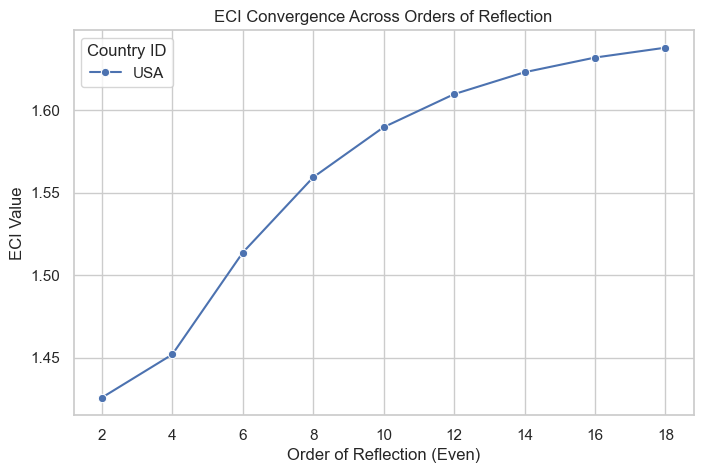

In [53]:
# plot_eci_convergence(ECI_GDP_2019, country_codes=["DEU"], skip_eci_orders=[0, 2])
plot_eci_convergence(ECI_GDP_2019, country_codes=["USA"], skip_eci_orders=[0])
# plot_eci_convergence(ECI_GDP_2019, country_codes=["CHN"], skip_eci_orders=[0])
# plot_eci_convergence(ECI_GDP_2019, country_codes=["USA", "CHN", "DEU", "JPN"], skip_eci_orders=[0, 2])

## Building correlation for clean data
linear relationship of given order of reflections of ECI and GDP per capita for a range of years

In [54]:
years = [*range(2014, 2020)]
n_order = 12

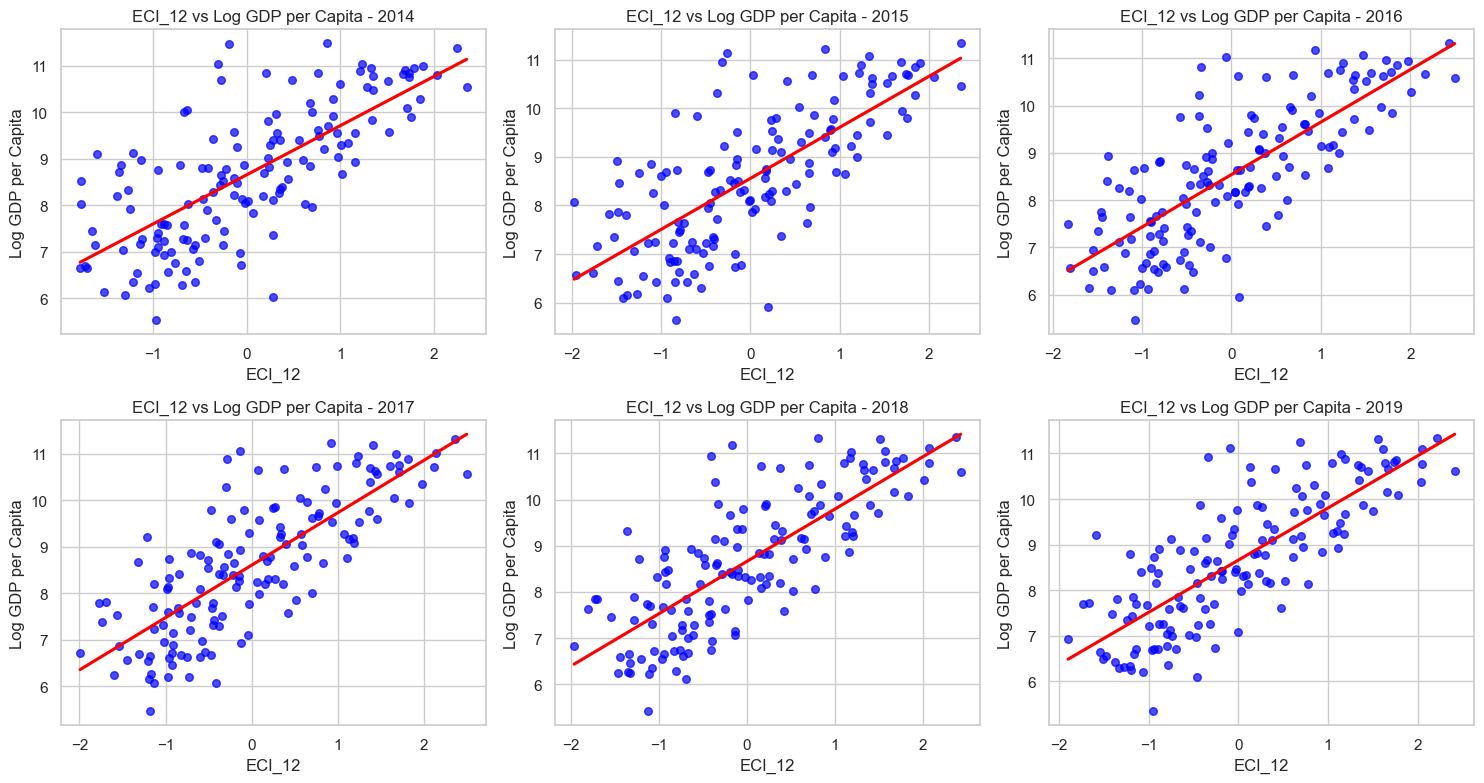

In [55]:
scatterplot_ECI_vs_GDP(ECI_GDP, year=years, n=n_order)

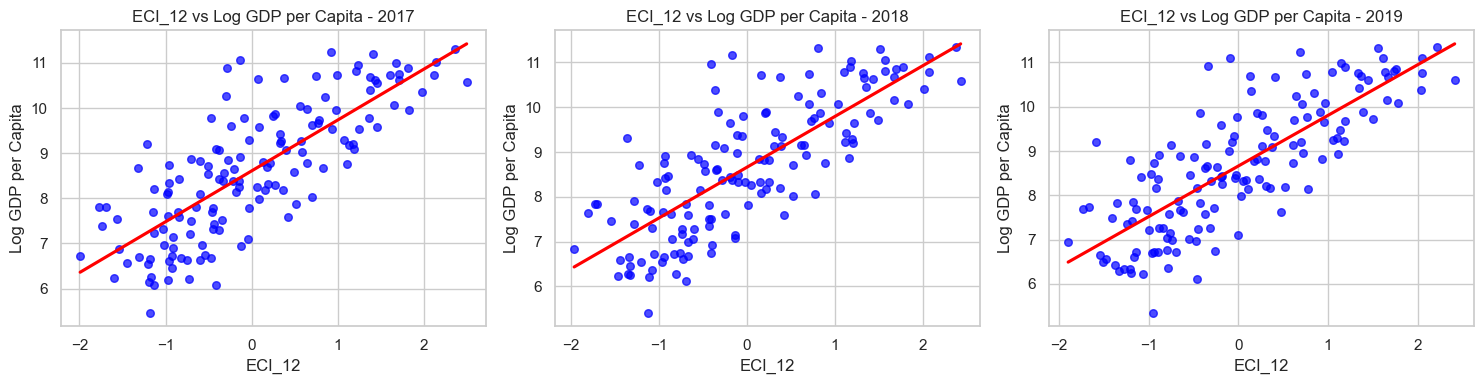

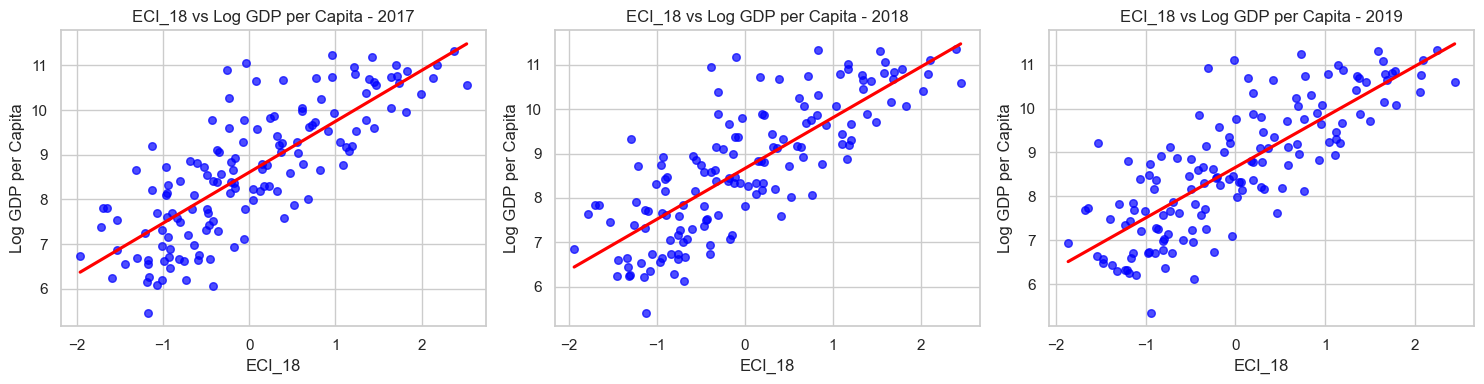

In [56]:
years = [*range(2017, 2020)]
n_orders = [12, 18]
for n_order in n_orders:
    scatterplot_ECI_vs_GDP(ECI_GDP, year=years, n=n_order)

Extra plot for reporting in thesis

In [102]:
from importlib import reload

# Import the module and reload it
import p06_mor_analysis

reload(p06_mor_analysis)

# Re-import the functions from the reloaded module
from p06_mor_analysis import plot_eci_vs_gdp_v2, lineplot_ECI_vs_GDP_correlation

cols=1, rows=1


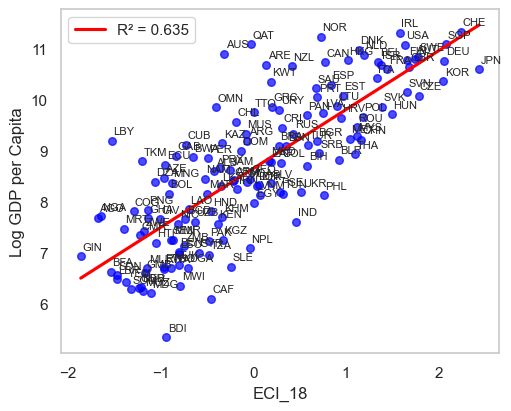

In [96]:
plot_eci_vs_gdp_v2(ECI_GDP, [2019], n=18, f_use_labels=True)

## Calculating the coefficient of determination, R-squared (R²), </br>to assess the strength of the relationship between the "GDP per capita" and "ECI" represented in scatterplot above

In [57]:
n_order = 12
ECI_GDP_12_2012 = filter_eci_to_gdp_n_order_year(ECI_GDP, year=2012, n=n_order)

In [58]:
calculate_ECI_GDP_r_squared(ECI_GDP_12_2012, n_order)

0.5331358564035885

In [59]:
# r_squared = 0.47525944287953514 for dataset with unreliable countries # ECI_12
# r_squared = 0.5111782249815722 for dataset without unreliable countries # ECI_12
# r_squared = 0.5331358564035885 for dataset without unreliable countries and countries with reliable gdp # ECI_12
# r_squared = 0.5501351728868762 for dataset without unreliable countries and countries with reliable gdp # ECI_18

In [60]:
n_order = 18
ECI_GDP_18_2012 = filter_eci_to_gdp_n_order_year(ECI_GDP, year=2012, n=n_order)

In [61]:
calculate_ECI_GDP_r_squared(ECI_GDP_18_2012, n_order)

0.5501351728868762

In [62]:
n_orders = list(range(10, 19))
ECI_correlation = calculate_yearly_eci_gdp_correlation(ECI_GDP, n_orders)

In [63]:
ECI_correlation

,year,ECI_10,ECI_11,ECI_12,ECI_13,ECI_14,ECI_15,ECI_16,ECI_17,ECI_18
0,2012,0.721887,-0.750512,0.730162,-0.748895,0.735622,-0.747979,0.739264,-0.747473,0.741711
1,2013,0.712005,-0.742376,0.720261,-0.740542,0.725815,-0.739445,0.729582,-0.738797,0.732153
2,2014,0.718738,-0.750291,0.726718,-0.747988,0.732152,-0.746592,0.735885,-0.745755,0.738466
3,2015,0.726793,-0.753813,0.734239,-0.752561,0.739362,-0.751921,0.742935,-0.751634,0.745452
4,2016,0.762625,-0.779576,0.768692,-0.779664,0.772698,-0.779918,0.775395,-0.780216,0.777236
5,2017,0.775308,-0.790524,0.781200,-0.791297,0.785139,-0.791953,0.787827,-0.792489,0.789686
6,2018,0.773787,-0.788696,0.778906,-0.788628,0.782237,-0.788660,0.784451,-0.788737,0.785940
7,2019,0.785251,-0.799989,0.790266,-0.799931,0.793523,-0.799942,0.795683,-0.799986,0.797133


In [64]:
# Saving merged ECI_correlation data to a .parquet file
output_file_name = "ECI_correlation.parquet"
save_hs92_parquet_data(
    data=ECI_correlation,
    file_location=output_file_location,
    file_name=output_file_name,
    dtype_dict={"year": "category"},
)

year column initial type:
category
year column final type:
int16


In [65]:
del ECI_GDP, ECI_correlation
gc.collect()

36695

In [66]:
# assert False, "End of code"

In [111]:
# Resolve the path to the 'src' folder with helper functions
import config_notebooks
from importlib import reload

# Import the module and reload it
import n06_import_reload

reload(n06_import_reload)

# Re-import the functions from the reloaded module
from p06_mor_analysis import plot_eci_vs_gdp_v2, lineplot_ECI_vs_GDP_correlation

os.getcwd():
c:\Users\Admin\Documents\Univer\MASTER THESIS IDEAS\Flavio Pinehro\11_MasterProject\notebooks
input_file_location:
..\data\05_mor_silver
output_file_location:
..\data\06_mor_gold


In [106]:
input_file_name = "ECI_correlation.parquet"
ECI_correlation = read_hs92_parquet_data(output_file_location, input_file_name)

year column initial type:
int16
year column final type:
category


Visualizing the correlation between ECI and GDP per capita for different orders of reflection across years

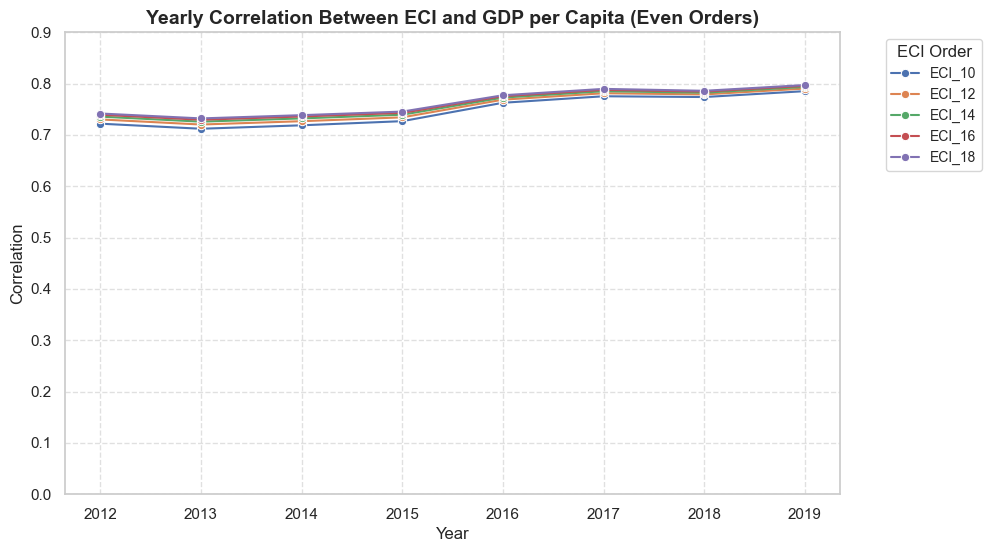

In [112]:
lineplot_ECI_vs_GDP_correlation(ECI_correlation)

In [70]:
# assert False, "End of code"